In [8]:
import ScraperFC as sfc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
from highlight_text import fig_text, ax_text
from adjustText import adjust_text
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib import cm
import scipy.stats as stats
from matplotlib.offsetbox import (OffsetImage,AnnotationBbox)
from griffis_soccer_analysis.fbref_code import *
from griffis_soccer_analysis.similarity import *
from griffis_soccer_analysis.whoscored_match_report import *
from scipy import stats
import math
import warnings
warnings.filterwarnings("ignore")
from mplsoccer import Radar, FontManager, grid, add_image, PyPizza, Pitch
from PIL import Image
from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from plottable.plots import image

URL4 = 'https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Thin.ttf'
robotto_thin = FontManager(URL4)
URL5 = ('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
        'RobotoSlab%5Bwght%5D.ttf')
robotto_bold = FontManager(URL5)

In [9]:
sofascore = sfc.Sofascore()

In [4]:
arg = sofascore.scrape_league_stats('2024', 'Argentina Copa de la Liga Profesional', accumulation='total', selected_positions=['Midfielders', 'Forwards']) 
br = sofascore.scrape_league_stats('2024', 'Paulista Série A1', accumulation='total', selected_positions=['Midfielders', 'Forwards']) 
argt = sofascore.scrape_league_stats('2024', 'Argentina Copa de la Liga Profesional', accumulation='total', selected_positions=['Midfielders', 'Forwards']) 
brt = sofascore.scrape_league_stats('2024', 'Paulista Série A1', accumulation='total', selected_positions=['Midfielders', 'Forwards']) 
copa = sofascore.scrape_league_stats('2024', 'Copa Libertadores', accumulation='per90', selected_positions=['Midfielders', 'Forwards']) 

KeyboardInterrupt: 

In [10]:
copa = sofascore.scrape_league_stats('2024', 'Copa Libertadores', accumulation='per90', selected_positions=['Midfielders', 'Forwards']) 

In [23]:
col1 = 'successfulDribblesPercentage'
col2 = 'keyPasses'
col3 = 'totalDuelsWonPercentage'
col4 = 'goals'
col5 = 'assists'
col6 = 'accuratePassesPercentage'
col7 = 'accurateFinalThirdPasses'
col8 = 'clearances'
col9 = 'wasFouled'
col10 = 'accurateLongBallsPercentage'
col11 = 'accurateLongBalls'
col12 = 'successfulDribbles'
col13 = 'accuratePasses'
col14 = 'totalDuelsWon'
col15 = 'accurateCrossesPercentage'
col16 = 'accurateCrosses'
col17 = 'totalShots'
col18 = 'goalConversionPercentage'
col19 = 'interceptions'
col20 = 'appearances'
col21 = 'shotsOnTarget'

arg = arg[['player', 'minutesPlayed', 'team', col1, col2, col3, col4, col5, col6, col7, col8, col9, col10, col11, col12, col13, col14, col15, col16, col17, col18, col19, col20, col21]]
br = br[['player', 'minutesPlayed', 'team', col1, col2, col3, col4, col5, col6, col7, col8, col9, col10, col11, col12, col13, col14, col15, col16, col17, col18, col19, col20, col21]]

In [24]:
arg.rename({'successfulDribblesPercentage': 'Suc.DribblesPer.'}, axis=1, inplace = True)
arg.rename({'totalDuelsWonPercentage': 'TotalDuelsWonPer.'}, axis=1, inplace = True)
arg.rename({'accuratePassesPercentage': 'Acc.PassesPer.'}, axis=1, inplace = True)
arg.rename({'accurateFinalThirdPasses': 'Acc.FinalThirdPasses.'}, axis=1, inplace = True)
arg.rename({'accurateLongBallsPercentage': 'Acc.LongBallsPer.'}, axis=1, inplace = True)
argt.rename({'successfulDribblesPercentage': 'Suc.DribblesPer.'}, axis=1, inplace = True)
argt.rename({'totalDuelsWonPercentage': 'TotalDuelsWonPer.'}, axis=1, inplace = True)
argt.rename({'accuratePassesPercentage': 'Acc.PassesPer.'}, axis=1, inplace = True)
argt.rename({'accurateFinalThirdPasses': 'Acc.FinalThirdPasses.'}, axis=1, inplace = True)
argt.rename({'accurateLongBallsPercentage': 'Acc.LongBallsPer.'}, axis=1, inplace = True)
br.rename({'successfulDribblesPercentage': 'Suc.DribblesPer.'}, axis=1, inplace = True)
br.rename({'totalDuelsWonPercentage': 'TotalDuelsWonPer.'}, axis=1, inplace = True)
br.rename({'accuratePassesPercentage': 'Acc.PassesPer.'}, axis=1, inplace = True)
br.rename({'accurateFinalThirdPasses': 'Acc.FinalThirdPasses.'}, axis=1, inplace = True)
br.rename({'accurateLongBallsPercentage': 'Acc.LongBallsPer.'}, axis=1, inplace = True)

In [25]:
limite1 = 'Claudio Echeverri'
limite2 = 'Endrick'
echeverri = arg[(arg['player'] == limite1)]
endrick = br[(br['player'] == limite2)]

In [26]:
parametros_radar = [
    'player',
    'team',
    'minutesPlayed',
    'Suc.DribblesPer.',
    'keyPasses',
    'TotalDuelsWonPer.',
    'goals',
    'assists',
    'Acc.PassesPer.',
    'Acc.FinalThirdPasses.',
    'interceptions',
    'clearances',
    'Acc.LongBallsPer.',
    'accurateLongBalls',
    'successfulDribbles',
    'accuratePasses',
    'totalDuelsWon',
]

In [27]:
params = parametros_radar[3:]

In [28]:
arg = arg[parametros_radar]
argt = argt[parametros_radar]

In [29]:
eche = echeverri[parametros_radar] 
en = endrick[parametros_radar] 

In [30]:
jugadora1 = 'Claudio Echeverri'
jugadora2 = 'Endrick'




valueseche = list(eche[eche['player'] == jugadora1].iloc[:,3:].reset_index(drop=True).iloc[0].values)
valuesen = list(en[en['player'] == jugadora2].iloc[:,3:].reset_index(drop=True).iloc[0].values)

In [31]:
low = list(argt[argt['minutesPlayed'] > argt['minutesPlayed'].quantile(.3)].iloc[:,3:].describe().loc['min'].values)
high = list(argt[argt['minutesPlayed'] > argt['minutesPlayed'].quantile(.3)].iloc[:,3:].describe().loc['max'].values)

In [32]:
import ScraperFC as sfc
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch, Pitch
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
from highlight_text import fig_text, ax_text
from adjustText import adjust_text
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib import cm
import scipy.stats as stats
from matplotlib.offsetbox import (OffsetImage,AnnotationBbox)
from mplsoccer import FontManager, add_image
from statsbombpy import sb

import matplotlib.image as mpimg

from PIL import Image
import os

import pandas as pd
from urllib.request import urlopen

import matplotlib.pyplot as plt
from PIL import Image

from mplsoccer import PyPizza, add_image, FontManager

from scipy import stats
import math

In [33]:
URL5 = 'https://github.com/VanillaandCream/Catamaran-Tamil/blob/master/Fonts/Catamaran-ExtraBold.ttf?raw=true'
catamaran = FontManager(URL5)

In [34]:
params

['Suc.DribblesPer.',
 'keyPasses',
 'TotalDuelsWonPer.',
 'goals',
 'assists',
 'Acc.PassesPer.',
 'Acc.FinalThirdPasses.',
 'interceptions',
 'clearances',
 'Acc.LongBallsPer.',
 'accurateLongBalls',
 'successfulDribbles',
 'accuratePasses',
 'totalDuelsWon']

In [35]:
low

[0.0, 0.0, 18.75, 0.0, 0.0, 48.28, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 2.0]

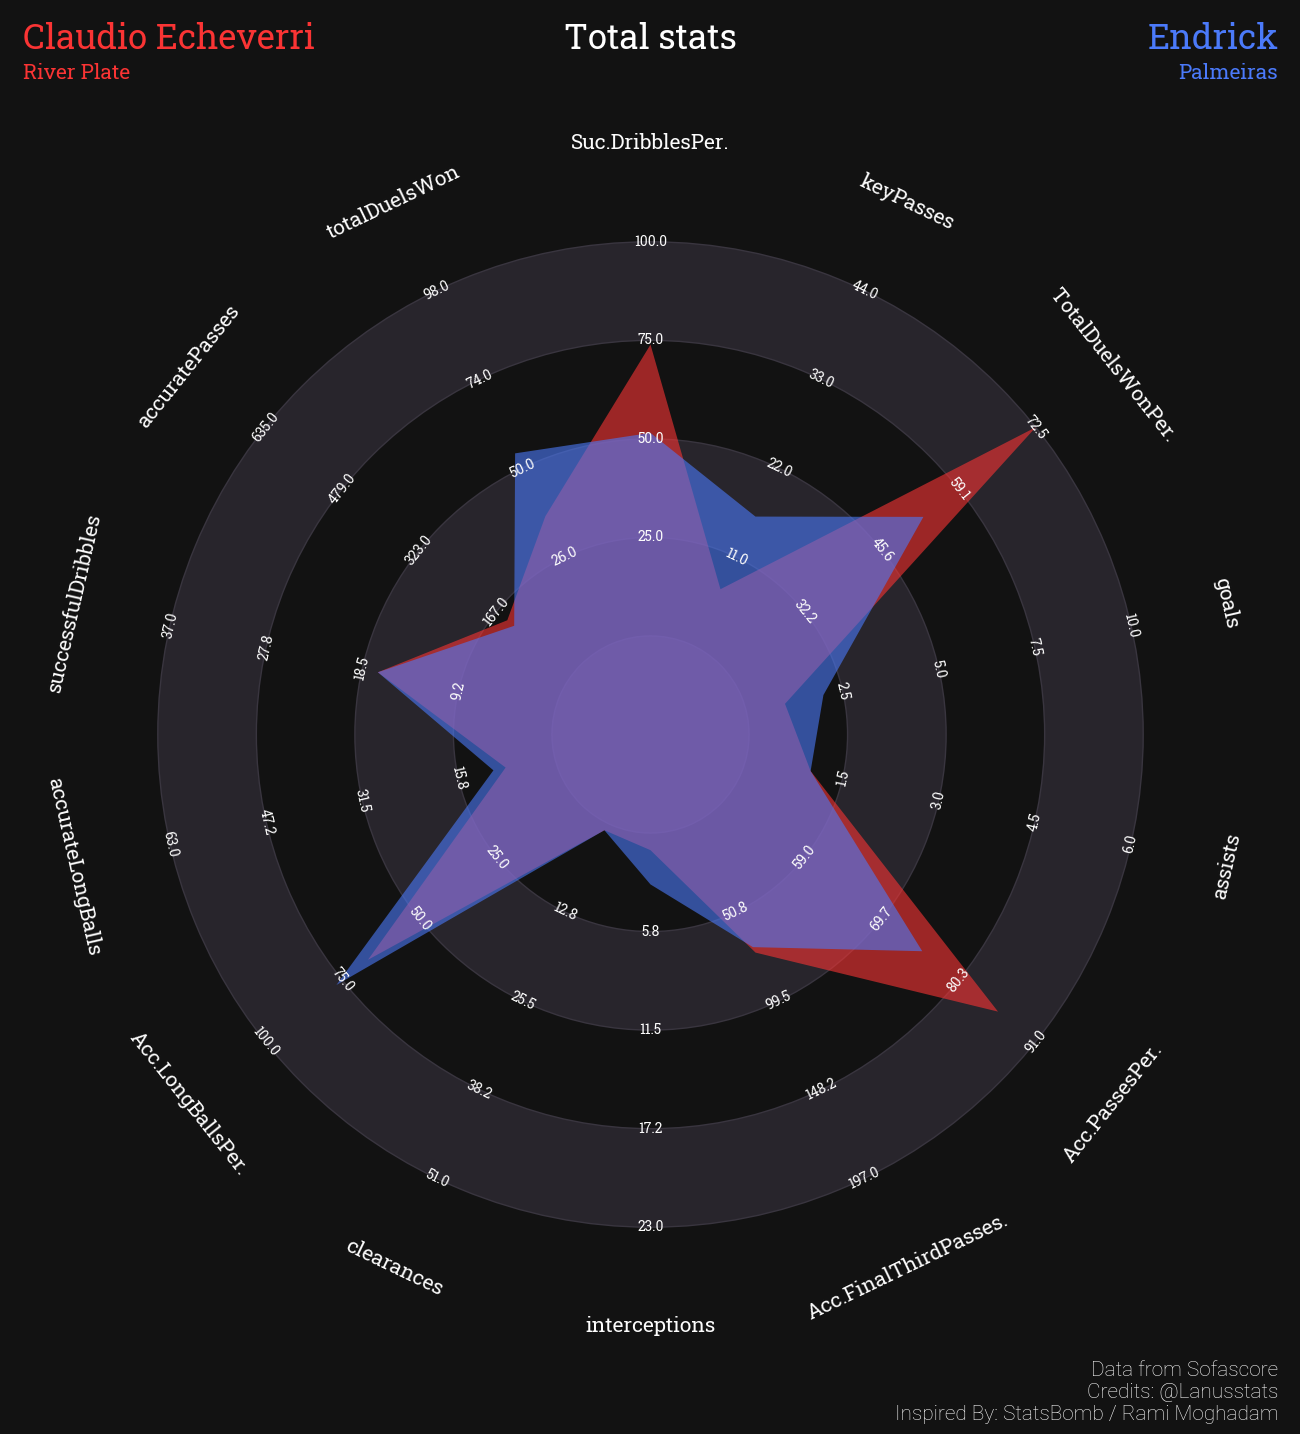

In [36]:
radar = Radar(params, low, high,
              # whether to round any of the labels to integers instead of decimal places
              round_int=[False]*len(params),
              num_rings=4,  # the number of concentric circles (excluding center circle)
              # if the ring_width is more than the center_circle_radius then
              # the center circle radius will be wider than the width of the concentric circles
              ring_width=1, center_circle_radius=1)

fig, axs = grid(figheight=14, grid_height=0.915, title_height=0.06, endnote_height=0.025,
                title_space=0, endnote_space=0, grid_key='radar', axis=False)

radar.setup_axis(ax=axs['radar'], facecolor='None')  # format axis as a radar
rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='#28252c', edgecolor='#39353f')
radar_output = radar.draw_radar_compare(valueseche, valuesen, ax=axs['radar'],
                                        kwargs_radar={'facecolor': '#fa3434', 'alpha': 0.6},
                                        kwargs_compare={'facecolor': '#4b7afa', 'alpha': 0.6})
radar_poly, radar_poly2, vertices1, vertices2 = radar_output
range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=10, color='#fcfcfc',
                                       fontproperties=robotto_bold.prop)
param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=15, color='#fcfcfc',
                                       fontproperties=robotto_bold.prop)



endnote_text = axs['endnote'].text(0.99, 0.5, 'Data from Sofascore\nCredits: @Lanusstats\nInspired By: StatsBomb / Rami Moghadam',
                                   color='#fcfcfc', fontproperties=robotto_thin.prop,
                                   fontsize=15, ha='right', va='center')


title1_text = axs['title'].text(0.01, 0.65, f'{jugadora1}', fontsize=25,
                                fontproperties=robotto_bold.prop,
                                ha='left', va='center', color='#fa3434')
title3_text = axs['title'].text(0.99, 0.65, f'{jugadora2}', fontsize=25,
                                fontproperties=robotto_bold.prop,
                                ha='right', va='center', color='#4b7afa')
title2_text = axs['title'].text(0.01, 0.25, f'{'River Plate'}', fontsize=15,
                                fontproperties=robotto_bold.prop,
                                ha='left', va='center', color='#fa3434')
title4_text = axs['title'].text(0.99, 0.25, f'{'Palmeiras'}', fontsize=15,
                                fontproperties=robotto_bold.prop,
                                ha='right', va='center', color='#4b7afa')
title5_text = axs['title'].text(0.50, 0.65, f'{'Total stats'}', fontsize=25,
                                fontproperties=robotto_bold.prop,
                                ha='center', va='center', color='#ffffff')




fig.set_facecolor('#121212')


plt.savefig('Comparation.png', bbox_inches='tight', dpi=300)